<a href="https://colab.research.google.com/github/wavallejol/ColabChem/blob/main/Sesi%C3%B3n4_EoS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sesión 4. Ecuaciones de Estado (EoS)**
***William Vallejo***
# **Objetivos**
 
 
1.   Representar el comportamiento termodinámico de los gases  utilizando Google Colabs
2.   Utilizar la sentencia `for` para la creación de rutinas
---

# **Introducción**

El estado termodinámico de los gases puede ser estudiado por medio de una ecuación algebráica que relaciona diferentes funciones de estado ($\small P, V, T $) del gas, ésta ecuación se conoce como  <a href="https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_de_estado">ecuación de estado</a>.  (EoS, por sus siglas en inglés). Existen diferentes tipos de ecuaciones de estado, un tipo especial de ecuaciones, son las EoS analíticas. Estas ecuaciones funciones tienen una característica importante, son funciones $\small f_{v}(T,V)$ que tienen exponentes del $\small V$ no mayores de la tercera potencia. Existe una ecuación general que permite representar todas las EoS cúbicas (Abbott, 1979. Fuente:<a href="https://books.google.com.co/books/about/The_Properties_of_Gases_and_Liquids_5E.html?id=9tGclC3ZRX0C&redir_esc=y"> B. Poling et.al., The properties of Gases and Liquids</a>):

$\small P=\frac{RT}{\bar{V}-b}-\frac{\Theta(\bar{V}-\eta)}{(\bar{V}-b)(V^{2}+\delta \bar{V}+\varepsilon )}$ $\small (1)$

Dónde dependiendo del modelo, los parámetros $\small \Theta, b, \eta, \delta, \varepsilon$ pueden ser constantes o pueden variar con T y la composición. La EoS más sencilla es la ecuación de los gases ideales, para este caso todos lo parámetros se hacen cero (puedes revisar  <a href="https://github.com/wavallejol/ColabChem/blob/main/Sesi%C3%B3n3_Gases_Ideales.ipynb">la sesión 3</a>  para ver algunos ejemplos). En la tabla 1 se listan los valores de los parámetros de algunas EoS de Vander Waals y Redlich-Kwong. 

<div align = "center">Tabla 1. Valores parámetros ec. 1 EoS de Vander Waals y Redlich-Kwong. (Fuente:<a href="https://books.google.com.co/books/about/The_Properties_of_Gases_and_Liquids_5E.html?id=9tGclC3ZRX0C&redir_esc=y"> B. Poling et.al., The properties of Gases and Liquids</a>).</div>
 
Nombre EoS|$\small \delta$ | $\small \varepsilon$| $\small \Theta$| $\small \eta$
-------------------|------------------|------------------|------------------|------------------
Van der Waals | $\small 0$ | $\small 0$ | $\small a$ |$\small b$  
Redlich Kwong | $\small b$ | $\small 0$ | $\small a/T^{0.5}$|$\small b$ 
 
A continuación estudiarémos dos casos de las EoS cúbicas: (i) la ecuación de Van der Waals y (ii) la ecuación de Redlich-Kwong.

#***Actividad 1: Ecuación de Van der Waals***

En la ecuación de <a href="https://es.m.wikipedia.org/wiki/Ecuaci%C3%B3n_de_Van_der_Waals#:~:text=La%20ecuaci%C3%B3n%20de%20Van%20der,fuerzas%20de%20Van%20der%20Waals."> Van der Waals</a> los parámetros de la ec. 1 toman los valores especificados en la tabla 1:

$\small P=\frac{RT}{(\bar{V}-b)}-\frac{a}{\bar{V}^2}$ $\small (2)$ 

Dónde los parámetros $\small a, b$ son constantes específicas para cada gas y R es la constante de los gases. Los valores de estas constantes se pueden determinar de acuerdo a el estado termodinámico del punto crítico:

$\small a=(\frac{27}{64})\frac{T_{c}^{2}R^{2}}{P_{c}}$ $\small (3)$ 
 
$\small b=(\frac{1}{8})\frac{RT_{c}}{P_{c}}$ $\small (4)$ 
 
Donde $\small (T_{c})$ y $\small (P_{c})$ corresponden a la temperatura y presión crítica del gas. 

Con la información suministrada, ahora compararémos el diagrama $\small (P  \bar{V})$ para un mol de metano utilizando la ecuación de Vander Waals a los siguientes valores de temperatura crítica ($\small 0.1,0.25,0.5,0.75,1.0,2.0)$.

Para resolver este ejercicio primero importamos las biliotecas que utilizarémos, definiremos as variables y la ecuación de Van der Waals.

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
 
R=8.314                      #Constante de los gases
Tc=190.4                     #Temperatura Critica metano (K)
Pc=4.6e6                     #Temperatura Critica metano (Pa)
a=(27/64)*Tc**2*R**2/Pc      #constante (a) Ec. Van der Waals
b=(Tc*R)/(Pc*8)              #constante (b) Ec. Van der Waals
 
def Pvw(T,Vm):               #Ec. Van der Waals
    Pvw=R*T/(Vm-b)- a/(Vm**2)
    return Pvw

Ahora, utilizarémos el bucle `for` para obtener el diagrama $\small (P  \bar{V})$ a cada una de las temperaturas establecidas en el ejercicio.

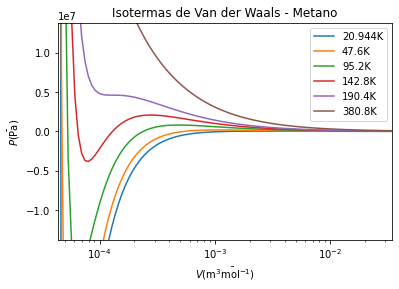

In [ ]:
fig = plt.figure(1)
for T in np.array([0.11,0.25,0.5,0.75,1,2])*Tc:                 #definimos el vector para los valores de Temperatura establecidos
    Vm=np.logspace(np.log10(b*1.01),2+np.log10(R*Tc/Pc),100)    #utilizamos escala logarítmica para representar los diferentes ordenes de magnitud
    plt.semilogx(Vm,Pvw(T,Vm), label=str(T)+"K")                #definimos los paramétros de la grafica
    plt.title("Isotermas de Van der Waals - Metano")            
    plt.ylabel(r"$ \bar{P (\mathrm{Pa})} $")                    
    plt.xlabel(r"$ \bar{V (\mathrm{m^{3}mol^{-1}})} $")         
    plt.ylim(-3*Pc,Pc*3)                                        
    plt.xlim(b,(100*R*Tc/Pc))                                   
plt.legend()
plt.show()


Ahora es tu turno 👊. Modifica la rutina de la celda de código anterior y grafíca el diagrama $\small P vs \bar{V}$ para un mol de $\small CCl_{4(g)}$.


#***Actividad 2: Ecuación de Redlich Kwong***

En la ecuación de <a href="https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_de_estado_Redlich%E2%80%93Kwong"> Redlich Kwong</a> los parámetros de la ec. 1 toman los valores especificados en la tabla 1:

$\small P=\frac{RT}{(\bar{V}-b)}-\frac{a}{T^{0.5}(\bar{V}^2+b\bar{V})}$ $\small (5)$ 

Dónde los parámetros $\small a, b$ son constantes específicas para cada gas y sus valores se pueden determinar de acuerdo a las condiciones termodinámicas del punto crítico:

$\small a=0.42748\frac{T_{c}^{2.5}R^{2}}{P_{c}}$ $\small (3)$ 
 
$\small b=0.08664\frac{RT_{c}}{P_{c}}$ $\small (4)$ 
 
Dónde $\small (T_{c})$ y $\small (P_{c})$ corresponden a la temperatura y presión crítica del gas. 

Con la información suministrada, ahora deberás comparar el diagrama $\small (P  \bar{V})$ para un mol de metano utilizando la ecuación de Redlich-Kwong a los siguientes valores de temperatura crítica ($\small 0.1,0.25,0.5,0.75,1.0,2.0)$.

---
#***Enlaces Recomendados***
 
*  Manual de NumPy: <a href="https://numpy.org/doc/stable/index.html">NumPy v1.21</a>
*  Tutorial de `numpy`: <a href="http://facundoq.github.io/courses/images/res/03_numpy.html">numpy</a>
*  Tutorial de `math`: <a href="https://docs.python.org/es/3/library/math.html">math</a>
*  Manual sentencia `for`: <a href="https://docs.python.org/es/3/tutorial/controlflow.html">Sentencia for</a>
*  Tutorial de matemáticas en phyton: (i) <a href="https://interactivechaos.com/es/manual/tutorial-de-python/variables">Matematicas en Phyton</a> (ii) <a href="https://personal.math.ubc.ca/~pwalls/math-python/jupyter/notebook/">Mathematical Phyton</a>
*  Tutorial de Álgebra lineal: <a href="https://relopezbriega.github.io/blog/2015/06/14/algebra-lineal-con-python/"> Álgebra Lineal con Phyton</a> 



#***Referencias***
*  NumPy, matplotlib and the Van der Waals Equation of State isotherms. <a href="https://nbviewer.jupyter.org/github/iurisegtovich/PyTherm-applied-thermodynamics/blob/master/contents/main-lectures/2-numpy-matplotlib-vdW-EoS-isotherms.ipynb">  PyTherm-applied-thermodynamics</a>.

